In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
from keras import losses
from keras import metrics

In [2]:
from keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train, X_test = X_train / 255., X_test / 255.

In [46]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    #Dense(784, activation='relu'),
    Dense(128, activation='relu'),
    #Dense(1024, activation='sigmoid'),
    Dense(10, activation='softmax'),
])

In [47]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [48]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [52]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=784,
    validation_data=(x_val, y_val)
)

Epoch 1/30
77/77 [==============================] - 1s 17ms/step - loss: 0.2956 - accuracy: 0.8939 - val_loss: 0.2756 - val_accuracy: 0.9010
Epoch 2/30
77/77 [==============================] - 1s 13ms/step - loss: 0.2809 - accuracy: 0.8994 - val_loss: 0.2681 - val_accuracy: 0.9025
Epoch 3/30
77/77 [==============================] - 1s 13ms/step - loss: 0.2795 - accuracy: 0.8997 - val_loss: 0.2718 - val_accuracy: 0.9039
Epoch 4/30
77/77 [==============================] - 1s 15ms/step - loss: 0.2713 - accuracy: 0.9032 - val_loss: 0.2613 - val_accuracy: 0.9062
Epoch 5/30
77/77 [==============================] - 1s 13ms/step - loss: 0.2691 - accuracy: 0.9036 - val_loss: 0.2512 - val_accuracy: 0.9082
Epoch 6/30
77/77 [==============================] - 1s 14ms/step - loss: 0.2613 - accuracy: 0.9058 - val_loss: 0.2479 - val_accuracy: 0.9113
Epoch 7/30
77/77 [==============================] - 1s 13ms/step - loss: 0.2581 - accuracy: 0.9073 - val_loss: 0.2417 - val_accuracy: 0.9135
Epoch 8/30
77

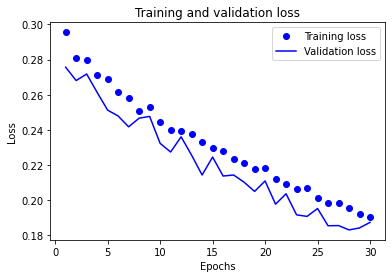

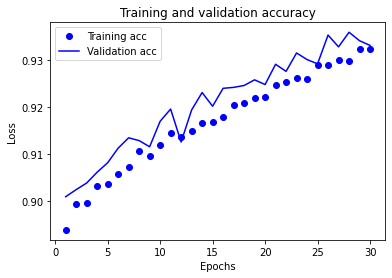

In [53]:
history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8846
